# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
data.to_csv("../data/raw/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
data["label"] = data["quality"].map({3:0,4:0,5:1,6:1,7:2,8:2})

In [7]:
data["label"].value_counts()

label
1    1319
2     217
0      63
Name: count, dtype: int64

In [8]:
X = data.drop(["quality","label"], axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_escalado = scaler.fit_transform(X_train)
X_test_escalado = scaler.transform(X_test)

In [10]:
# K inicial = 4
modelKNN = KNeighborsClassifier(n_neighbors=4)
modelKNN.fit(X_train_escalado, y_train)
y_predKNN = modelKNN.predict(X_test_escalado)

In [11]:
accuracy_score(y_test,y_predKNN)

0.85

In [12]:
confusion_matrix(y_test,y_predKNN)

array([[  3,   8,   0],
       [  2, 255,   5],
       [  0,  33,  14]])

In [13]:
classification_report(y_test,y_predKNN)

'              precision    recall  f1-score   support\n\n           0       0.60      0.27      0.38        11\n           1       0.86      0.97      0.91       262\n           2       0.74      0.30      0.42        47\n\n    accuracy                           0.85       320\n   macro avg       0.73      0.51      0.57       320\nweighted avg       0.83      0.85      0.82       320\n'

In [14]:
accuracies = []

for k in range(1,21):
    modelOpt = KNeighborsClassifier(n_neighbors=k)
    modelOpt.fit(X_train_escalado, y_train)
    y_pred_Opt = modelOpt.predict(X_test_escalado)
    accuracies.append(accuracy_score(y_test, y_pred_Opt))

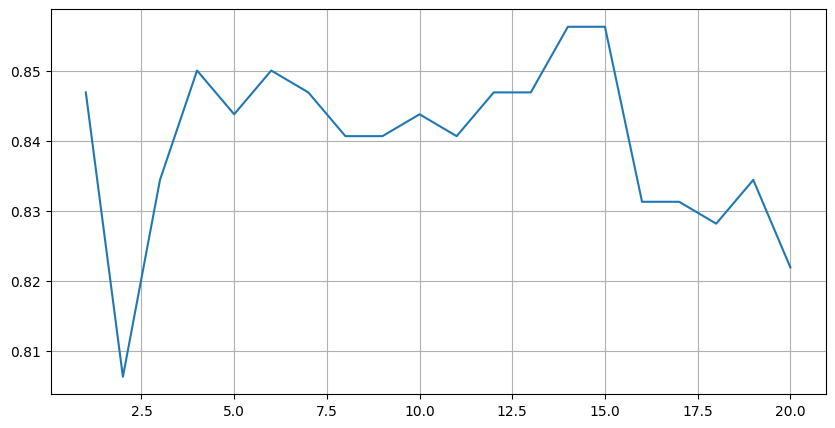

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21, 1), accuracies)
plt.grid()
plt.show()

El mejor valor se obtuvo con un K entre 14 y 15

In [24]:
def predict_wine_quality(lista_num):
    lista_escalada = scaler.fit_transform([lista_num])
    y_pred_Result = modelOpt.predict(lista_escalada)[0]
    if y_pred_Result==0:
        return "Este vino probablemente sea de calidad baja 🍷"
    elif y_pred_Result==1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de calidad alta 🍷"
    

texto = predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])

print(texto)

Este vino probablemente sea de calidad media 🍷
